# Stationarity Tests and Statistical Analysis

This notebook demonstrates various statistical tests for time series analysis:
- Weak Stationarity
  - **ADF Test (Augmented Dickey-Fuller)**: Tests for unit root (non-stationarity)
  - **KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin)**: Tests for stationarity
- Strict Stationarity
  - **KS Test (Kolmogorov-Smirnov)**: Tests for distribution equality

## Libraries and Data Setup

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
# Download stock data using yfinance
# Let's use multiple stocks for comprehensive analysis
stocks = ['AAPL', 'GOOGL', 'MSFT', 'TSLA']
start_date = '2020-01-01'
end_date = '2024-01-01'

# Download data
stock_data = {}
for stock in stocks:
    try:
        data = yf.download(stock, start=start_date, end=end_date)
        stock_data[stock] = data['Close']
        print(f"Downloaded {stock} data: {len(data)} rows")
    except Exception as e:
        print(f"Error downloading {stock}: {e}")

# Create a combined DataFrame - fix the issue by ensuring we have proper Series
df = pd.DataFrame()
for stock, series in stock_data.items():
    df[stock] = series

print(f"\nCombined dataset shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Downloaded AAPL data: 1006 rows
Downloaded GOOGL data: 1006 rows
Downloaded MSFT data: 1006 rows
Downloaded TSLA data: 1006 rows

Combined dataset shape: (1006, 4)
Date range: 2020-01-02 00:00:00 to 2023-12-29 00:00:00


,AAPL,GOOGL,MSFT,TSLA
Date,,,,
2020-01-02,72.538528,67.965233,152.791138,28.684000
2020-01-03,71.833298,67.609688,150.888580,29.534000
2020-01-06,72.405685,69.411774,151.278641,30.102667
2020-01-07,72.065163,69.277679,149.899307,31.270666
2020-01-08,73.224403,69.770782,152.286957,32.809334


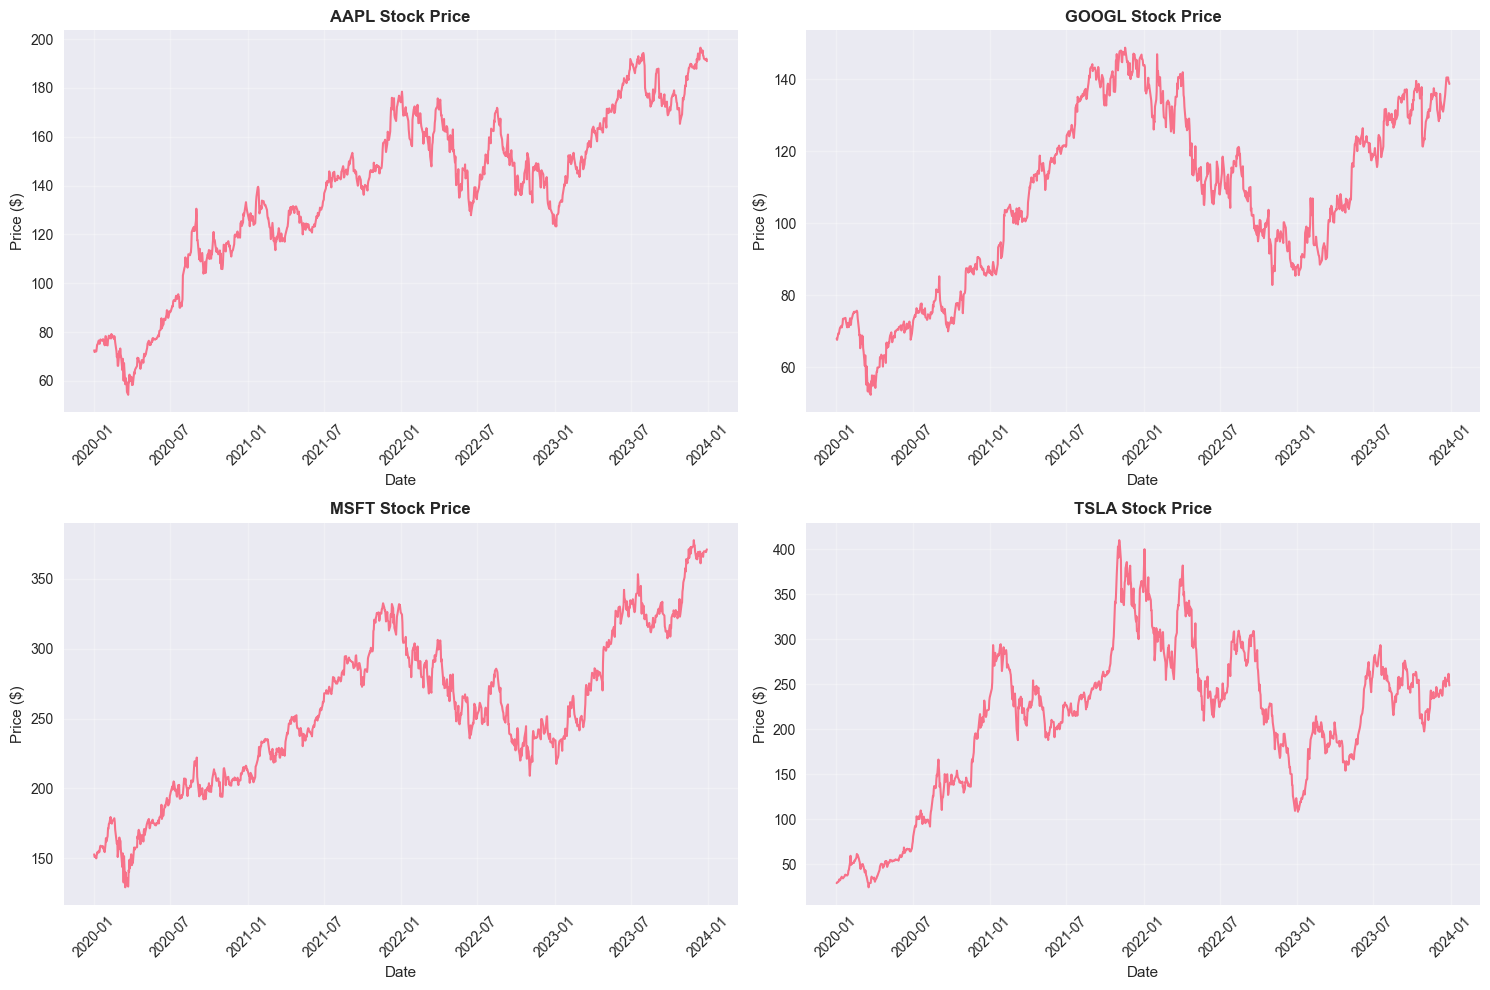

Log returns calculated for stationarity analysis
Log returns shape: (1005, 4)


,AAPL,GOOGL,MSFT,TSLA
Date,,,,
2020-01-03,-0.009770,-0.005245,-0.012530,0.029203
2020-01-06,0.007937,0.026305,0.002582,0.019072
2020-01-07,-0.004714,-0.001934,-0.009160,0.038067
2020-01-08,0.015958,0.007093,0.015803,0.048033
2020-01-09,0.021018,0.010443,0.012415,-0.022189


In [5]:
# Visualize the stock data
plt.figure(figsize=(15, 10))

for i, stock in enumerate(stocks, 1):
    plt.subplot(2, 2, i)
    plt.plot(df.index, df[stock], linewidth=1.5)
    plt.title(f'{stock} Stock Price', fontsize=12, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate log returns for stationarity analysis
log_returns = np.log(df / df.shift(1)).dropna()
print("Log returns calculated for stationarity analysis")
print(f"Log returns shape: {log_returns.shape}")
log_returns.head()

### Why Price Ratios and Log Returns?

**Price Ratios (`df / df.shift(1)`):**
- **Remove scale differences**: Compare $100 stock vs $2000 stock on equal footing
- **Show relative changes**: 1.02 = 2% increase for any stock price level

**Log Returns (`np.log(price_ratio)`):**
- **Make data stationary**: Stock prices trend upward, but returns oscillate around zero
- **Enable statistical tests**: ADF/KPSS tests require stationary-like properties
- **Mathematical advantages**: Log returns are additive over time and more likely to be normally distributed

**Bottom line**: Raw prices can't be used for stationarity tests - they always trend upward and have different scales. Log returns solve both problems! 📊

## ADF Test (Augmented Dickey-Fuller Test)

The ADF test tests the null hypothesis that a unit root is present in the time series.
- **Null Hypothesis (H0)**: The series has a unit root (non-stationary)
- **Alternative Hypothesis (H1)**: The series is stationary
- **Decision Rule**: If p-value < 0.05, reject H0 (series is stationary)

In [ ]:
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(series, series_name):
    print(f"ADF Test Results for {series_name}")

    adf_result = adfuller(series.dropna())
    
    # Extract results
    adf_statistic = adf_result[0]
    p_value = adf_result[1]
    critical_values = adf_result[4]
    
    print(f"ADF Statistic: {adf_statistic:.6f}")
    print(f"P-value: {p_value:.6f}")
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"\t{key}: {value:.3f}")
    
    # Interpretation
    if p_value <= 0.05:
        print(f"\nResult: REJECT null hypothesis (p-value = {p_value:.6f}) \n Staionary")
    else:
        print(f"\nResult: FAIL TO REJECT null hypothesis (p-value = {p_value:.6f})\n Non-Stationary")
    
    return adf_statistic, p_value, critical_values

adf_results_prices = {}
for stock in stocks:
    adf_results_prices[stock] = perform_adf_test(df[stock], f"{stock} Price")

# Perform ADF test on log returns
print("\n\nADF TEST ON LOG RETURNS")
adf_results_returns = {}
for stock in stocks:
    adf_results_returns[stock] = perform_adf_test(log_returns[stock], f"{stock} Log Returns")

ADF Test Results for AAPL Price
ADF Statistic: -1.511950
P-value: 0.527592
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568

Result: FAIL TO REJECT null hypothesis (p-value = 0.527592)
 Non-Stationary
ADF Test Results for GOOGL Price
ADF Statistic: -1.520830
P-value: 0.523183
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568

Result: FAIL TO REJECT null hypothesis (p-value = 0.523183)
 Non-Stationary
ADF Test Results for MSFT Price
ADF Statistic: -0.999180
P-value: 0.753563
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568

Result: FAIL TO REJECT null hypothesis (p-value = 0.753563)
 Non-Stationary
ADF Test Results for TSLA Price
ADF Statistic: -2.407545
P-value: 0.139618
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568

Result: FAIL TO REJECT null hypothesis (p-value = 0.139618)
 Non-Stationary


ADF TEST ON LOG RETURNS
ADF Test Results for AAPL Log Returns
ADF Statistic: -10.091928
P-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568

Result: REJE

## KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin Test)

The KPSS test tests the null hypothesis that the series is stationary.
- **Null Hypothesis (H0)**: The series is stationary
- **Alternative Hypothesis (H1)**: The series has a unit root (non-stationary)
- **Decision Rule**: If p-value < 0.05, reject H0 (series is non-stationary)

In [15]:
from statsmodels.tsa.stattools import kpss

def perform_kpss_test(series, series_name, regression='c'):
    print(f"KPSS Test Results for {series_name}")
    
    kpss_statistic, p_value, lags, critical_values = kpss(series.dropna(), regression=regression)
    
    print(f"KPSS Statistic: {kpss_statistic:.6f}")
    print(f"P-value: {p_value:.6f}")
    print(f"Lags Used: {lags}")
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"\t{key}: {value:.3f}")
    
    # Interpretation
    if p_value <= 0.05:
        print(f"\nResult: REJECT null hypothesis (p-value = {p_value:.6f}) \n Non-Stationary")
    else:
        print(f"\nResult: FAIL TO REJECT null hypothesis (p-value = {p_value:.6f})\n Stationary")
    
    return kpss_statistic, p_value, critical_values

# Perform KPSS test on stock prices (levels)
print("KPSS TEST ON STOCK PRICES (LEVELS)")

kpss_results_prices = {}
for stock in stocks:
    kpss_results_prices[stock] = perform_kpss_test(df[stock], f"{stock} Price")

# Perform KPSS test on log returns
print("\n\nKPSS TEST ON LOG RETURNS")

kpss_results_returns = {}
for stock in stocks:
    kpss_results_returns[stock] = perform_kpss_test(log_returns[stock], f"{stock} Log Returns")

KPSS TEST ON STOCK PRICES (LEVELS)
KPSS Test Results for AAPL Price
KPSS Statistic: 3.935864
P-value: 0.010000
Lags Used: 19
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739

Result: REJECT null hypothesis (p-value = 0.010000) 
 Non-Stationary
KPSS Test Results for GOOGL Price
KPSS Statistic: 2.170584
P-value: 0.010000
Lags Used: 19
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739

Result: REJECT null hypothesis (p-value = 0.010000) 
 Non-Stationary
KPSS Test Results for MSFT Price
KPSS Statistic: 3.285807
P-value: 0.010000
Lags Used: 19
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739

Result: REJECT null hypothesis (p-value = 0.010000) 
 Non-Stationary
KPSS Test Results for TSLA Price
KPSS Statistic: 1.899147
P-value: 0.010000
Lags Used: 19
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739

Result: REJECT null hypothesis (p-value = 0.010000) 
 Non-Stationary


KPSS TEST ON LOG RETURNS
KPSS Test Results for AAPL Log Returns
KP

In [16]:
# Create a summary comparison table for ADF and KPSS tests
def create_stationarity_summary():
    summary_data = []
    
    for stock in stocks:
        # Price level results
        adf_price_pvalue = adf_results_prices[stock][1]
        kpss_price_pvalue = kpss_results_prices[stock][1]
        
        # Log returns results
        adf_returns_pvalue = adf_results_returns[stock][1]
        kpss_returns_pvalue = kpss_results_returns[stock][1]
        
        # Determine stationarity conclusions
        price_adf_stationary = "Stationary" if adf_price_pvalue <= 0.05 else "Non-Stationary"
        price_kpss_stationary = "Stationary" if kpss_price_pvalue > 0.05 else "Non-Stationary"
        
        returns_adf_stationary = "Stationary" if adf_returns_pvalue <= 0.05 else "Non-Stationary"
        returns_kpss_stationary = "Stationary" if kpss_returns_pvalue > 0.05 else "Non-Stationary"
        
        summary_data.append({
            'Stock': stock,
            'Data_Type': 'Price',
            'ADF_p_value': f"{adf_price_pvalue:.6f}",
            'ADF_Result': price_adf_stationary,
            'KPSS_p_value': f"{kpss_price_pvalue:.6f}",
            'KPSS_Result': price_kpss_stationary
        })
        
        summary_data.append({
            'Stock': stock,
            'Data_Type': 'Log_Returns',
            'ADF_p_value': f"{adf_returns_pvalue:.6f}",
            'ADF_Result': returns_adf_stationary,
            'KPSS_p_value': f"{kpss_returns_pvalue:.6f}",
            'KPSS_Result': returns_kpss_stationary
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

# Create and display summary
summary_df = create_stationarity_summary()
print("\nSTATIONARITY TEST SUMMARY")
print("="*80)
print(summary_df.to_string(index=False))

# Interpretation guide
print("\n\nINTERPRETATION GUIDE:")
print("="*50)
print("• ADF Test: p-value < 0.05 → Reject H0 → Series is STATIONARY")
print("• KPSS Test: p-value > 0.05 → Fail to reject H0 → Series is STATIONARY")
print("• Best practice: Both tests should agree for confident conclusion")


STATIONARITY TEST SUMMARY
Stock   Data_Type ADF_p_value     ADF_Result KPSS_p_value    KPSS_Result
 AAPL       Price    0.527592 Non-Stationary     0.010000 Non-Stationary
 AAPL Log_Returns    0.000000     Stationary     0.100000     Stationary
GOOGL       Price    0.523183 Non-Stationary     0.010000 Non-Stationary
GOOGL Log_Returns    0.000000     Stationary     0.100000     Stationary
 MSFT       Price    0.753563 Non-Stationary     0.010000 Non-Stationary
 MSFT Log_Returns    0.000000     Stationary     0.100000     Stationary
 TSLA       Price    0.139618 Non-Stationary     0.010000 Non-Stationary
 TSLA Log_Returns    0.000000     Stationary     0.059650     Stationary


INTERPRETATION GUIDE:
• ADF Test: p-value < 0.05 → Reject H0 → Series is STATIONARY
• KPSS Test: p-value > 0.05 → Fail to reject H0 → Series is STATIONARY
• Best practice: Both tests should agree for confident conclusion


## KS Test (Kolmogorov-Smirnov Test)

The KS test is used to test if two samples come from the same distribution or if a sample follows a specific distribution.
- **Two-sample KS test**: Tests if two samples come from the same distribution
- **One-sample KS test**: Tests if a sample follows a specific distribution (e.g., normal)
- **Decision Rule**: If p-value < 0.05, reject H0 (distributions are different)

In [9]:
# Example 1: Two-sample KS test comparing log returns of different stocks
def perform_two_sample_ks_test(sample1, sample2, name1, name2):
    """
    Perform two-sample Kolmogorov-Smirnov test
    """
    print(f"\n{'='*60}")
    print(f"Two-Sample KS Test: {name1} vs {name2}")
    print(f"{'='*60}")
    
    # Remove NaN values
    sample1_clean = sample1.dropna()
    sample2_clean = sample2.dropna()
    
    # Perform KS test
    ks_statistic, p_value = stats.ks_2samp(sample1_clean, sample2_clean)
    
    print(f"Sample 1 ({name1}):")
    print(f"  Mean: {sample1_clean.mean():.6f}")
    print(f"  Std:  {sample1_clean.std():.6f}")
    print(f"  Size: {len(sample1_clean)}")
    
    print(f"\nSample 2 ({name2}):")
    print(f"  Mean: {sample2_clean.mean():.6f}")
    print(f"  Std:  {sample2_clean.std():.6f}")
    print(f"  Size: {len(sample2_clean)}")
    
    print(f"\nKS Test Results:")
    print(f"KS Statistic: {ks_statistic:.6f}")
    print(f"P-value: {p_value:.6f}")
    
    # Interpretation
    if p_value <= 0.05:
        print(f"\nResult: REJECT null hypothesis (p-value = {p_value:.6f})")
        print("Conclusion: The two samples come from DIFFERENT distributions")
    else:
        print(f"\nResult: FAIL TO REJECT null hypothesis (p-value = {p_value:.6f})")
        print("Conclusion: The two samples come from the SAME distribution")
    
    return ks_statistic, p_value

# Compare log returns between different stocks
print("TWO-SAMPLE KS TESTS - COMPARING STOCK RETURNS")
print("="*80)

# Test 1: AAPL vs GOOGL
perform_two_sample_ks_test(log_returns['AAPL'], log_returns['GOOGL'], 'AAPL', 'GOOGL')

# Test 2: MSFT vs TSLA
perform_two_sample_ks_test(log_returns['MSFT'], log_returns['TSLA'], 'MSFT', 'TSLA')

# Test 3: Tech stocks (AAPL+GOOGL+MSFT) vs TSLA
tech_returns = pd.concat([log_returns['AAPL'], log_returns['GOOGL'], log_returns['MSFT']])
perform_two_sample_ks_test(tech_returns, log_returns['TSLA'], 'Tech Stocks (AAPL+GOOGL+MSFT)', 'TSLA')

TWO-SAMPLE KS TESTS - COMPARING STOCK RETURNS

Two-Sample KS Test: AAPL vs GOOGL
Sample 1 (AAPL):
  Mean: 0.000963
  Std:  0.021137
  Size: 1005

Sample 2 (GOOGL):
  Mean: 0.000710
  Std:  0.021151
  Size: 1005

KS Test Results:
KS Statistic: 0.023881
P-value: 0.936975

Result: FAIL TO REJECT null hypothesis (p-value = 0.936975)
Conclusion: The two samples come from the SAME distribution

Two-Sample KS Test: MSFT vs TSLA
Sample 1 (MSFT):
  Mean: 0.000883
  Std:  0.020555
  Size: 1005

Sample 2 (TSLA):
  Mean: 0.002148
  Std:  0.042906
  Size: 1005

KS Test Results:
KS Statistic: 0.165174
P-value: 0.000000

Result: REJECT null hypothesis (p-value = 0.000000)
Conclusion: The two samples come from DIFFERENT distributions

Two-Sample KS Test: Tech Stocks (AAPL+GOOGL+MSFT) vs TSLA
Sample 1 (Tech Stocks (AAPL+GOOGL+MSFT)):
  Mean: 0.000852
  Std:  0.020943
  Size: 3015

Sample 2 (TSLA):
  Mean: 0.002148
  Std:  0.042906
  Size: 1005

KS Test Results:
KS Statistic: 0.156551
P-value: 0.000000


(np.float64(0.15655058043117745), np.float64(1.466567150825008e-16))

In [10]:
# Example 2: One-sample KS test to check if returns follow normal distribution
def perform_one_sample_ks_test(sample, distribution, distribution_name, sample_name):
    """
    Perform one-sample Kolmogorov-Smirnov test against a theoretical distribution
    """
    print(f"\n{'='*60}")
    print(f"One-Sample KS Test: {sample_name} vs {distribution_name}")
    print(f"{'='*60}")
    
    # Remove NaN values
    sample_clean = sample.dropna()
    
    # Perform KS test
    ks_statistic, p_value = stats.kstest(sample_clean, distribution)
    
    print(f"Sample statistics:")
    print(f"  Mean: {sample_clean.mean():.6f}")
    print(f"  Std:  {sample_clean.std():.6f}")
    print(f"  Skewness: {stats.skew(sample_clean):.6f}")
    print(f"  Kurtosis: {stats.kurtosis(sample_clean):.6f}")
    print(f"  Size: {len(sample_clean)}")
    
    print(f"\nKS Test Results:")
    print(f"KS Statistic: {ks_statistic:.6f}")
    print(f"P-value: {p_value:.6f}")
    
    # Interpretation
    if p_value <= 0.05:
        print(f"\nResult: REJECT null hypothesis (p-value = {p_value:.6f})")
        print(f"Conclusion: The sample does NOT follow {distribution_name}")
    else:
        print(f"\nResult: FAIL TO REJECT null hypothesis (p-value = {p_value:.6f})")
        print(f"Conclusion: The sample follows {distribution_name}")
    
    return ks_statistic, p_value

print("\nONE-SAMPLE KS TESTS - TESTING FOR NORMALITY")
print("="*80)

# Test each stock's log returns against normal distribution
for stock in stocks:
    returns = log_returns[stock].dropna()
    # Create normal distribution with same mean and std as the sample
    normal_dist = lambda x: stats.norm.cdf(x, loc=returns.mean(), scale=returns.std())
    perform_one_sample_ks_test(returns, normal_dist, 'Normal Distribution', f'{stock} Log Returns')


ONE-SAMPLE KS TESTS - TESTING FOR NORMALITY

One-Sample KS Test: AAPL Log Returns vs Normal Distribution
Sample statistics:
  Mean: 0.000963
  Std:  0.021137
  Skewness: -0.141787
  Kurtosis: 4.962287
  Size: 1005

KS Test Results:
KS Statistic: 0.069744
P-value: 0.000107

Result: REJECT null hypothesis (p-value = 0.000107)
Conclusion: The sample does NOT follow Normal Distribution

One-Sample KS Test: GOOGL Log Returns vs Normal Distribution
Sample statistics:
  Mean: 0.000710
  Std:  0.021151
  Skewness: -0.262241
  Kurtosis: 3.434807
  Size: 1005

KS Test Results:
KS Statistic: 0.066246
P-value: 0.000281

Result: REJECT null hypothesis (p-value = 0.000281)
Conclusion: The sample does NOT follow Normal Distribution

One-Sample KS Test: MSFT Log Returns vs Normal Distribution
Sample statistics:
  Mean: 0.000883
  Std:  0.020555
  Skewness: -0.242750
  Kurtosis: 6.883122
  Size: 1005

KS Test Results:
KS Statistic: 0.063084
P-value: 0.000640

Result: REJECT null hypothesis (p-value = 

In [11]:
# Example 3: Additional KS test examples with synthetic data
print("\nADDITIONAL KS TEST EXAMPLES WITH SYNTHETIC DATA")
print("="*80)

# Generate synthetic datasets
np.random.seed(42)
n_samples = 1000

# Dataset 1: Normal distribution
normal_data = np.random.normal(0, 1, n_samples)

# Dataset 2: Exponential distribution
exp_data = np.random.exponential(1, n_samples)

# Dataset 3: Uniform distribution
uniform_data = np.random.uniform(-2, 2, n_samples)

# Dataset 4: Normal distribution with different parameters
normal_data2 = np.random.normal(0.5, 1.5, n_samples)

print("\nExample 1: Normal vs Exponential distributions")
ks_stat, p_val = stats.ks_2samp(normal_data, exp_data)
print(f"KS Statistic: {ks_stat:.6f}, P-value: {p_val:.6f}")
print("Result: Different distributions" if p_val < 0.05 else "Result: Same distributions")

print("\nExample 2: Two Normal distributions with different parameters")
ks_stat, p_val = stats.ks_2samp(normal_data, normal_data2)
print(f"KS Statistic: {ks_stat:.6f}, P-value: {p_val:.6f}")
print("Result: Different distributions" if p_val < 0.05 else "Result: Same distributions")

print("\nExample 3: Normal vs Uniform distributions")
ks_stat, p_val = stats.ks_2samp(normal_data, uniform_data)
print(f"KS Statistic: {ks_stat:.6f}, P-value: {p_val:.6f}")
print("Result: Different distributions" if p_val < 0.05 else "Result: Same distributions")

# Test against theoretical distributions
print("\nExample 4: Testing synthetic normal data against theoretical normal distribution")
ks_stat, p_val = stats.kstest(normal_data, 'norm')
print(f"KS Statistic: {ks_stat:.6f}, P-value: {p_val:.6f}")
print("Result: Not normal" if p_val < 0.05 else "Result: Normal distribution")

print("\nExample 5: Testing exponential data against theoretical exponential distribution")
ks_stat, p_val = stats.kstest(exp_data, 'expon')
print(f"KS Statistic: {ks_stat:.6f}, P-value: {p_val:.6f}")
print("Result: Not exponential" if p_val < 0.05 else "Result: Exponential distribution")


ADDITIONAL KS TEST EXAMPLES WITH SYNTHETIC DATA

Example 1: Normal vs Exponential distributions
KS Statistic: 0.490000, P-value: 0.000000
Result: Different distributions

Example 2: Two Normal distributions with different parameters
KS Statistic: 0.239000, P-value: 0.000000
Result: Different distributions

Example 3: Normal vs Uniform distributions
KS Statistic: 0.106000, P-value: 0.000026
Result: Different distributions

Example 4: Testing synthetic normal data against theoretical normal distribution
KS Statistic: 0.017328, P-value: 0.919663
Result: Normal distribution

Example 5: Testing exponential data against theoretical exponential distribution
KS Statistic: 0.023657, P-value: 0.621627
Result: Exponential distribution


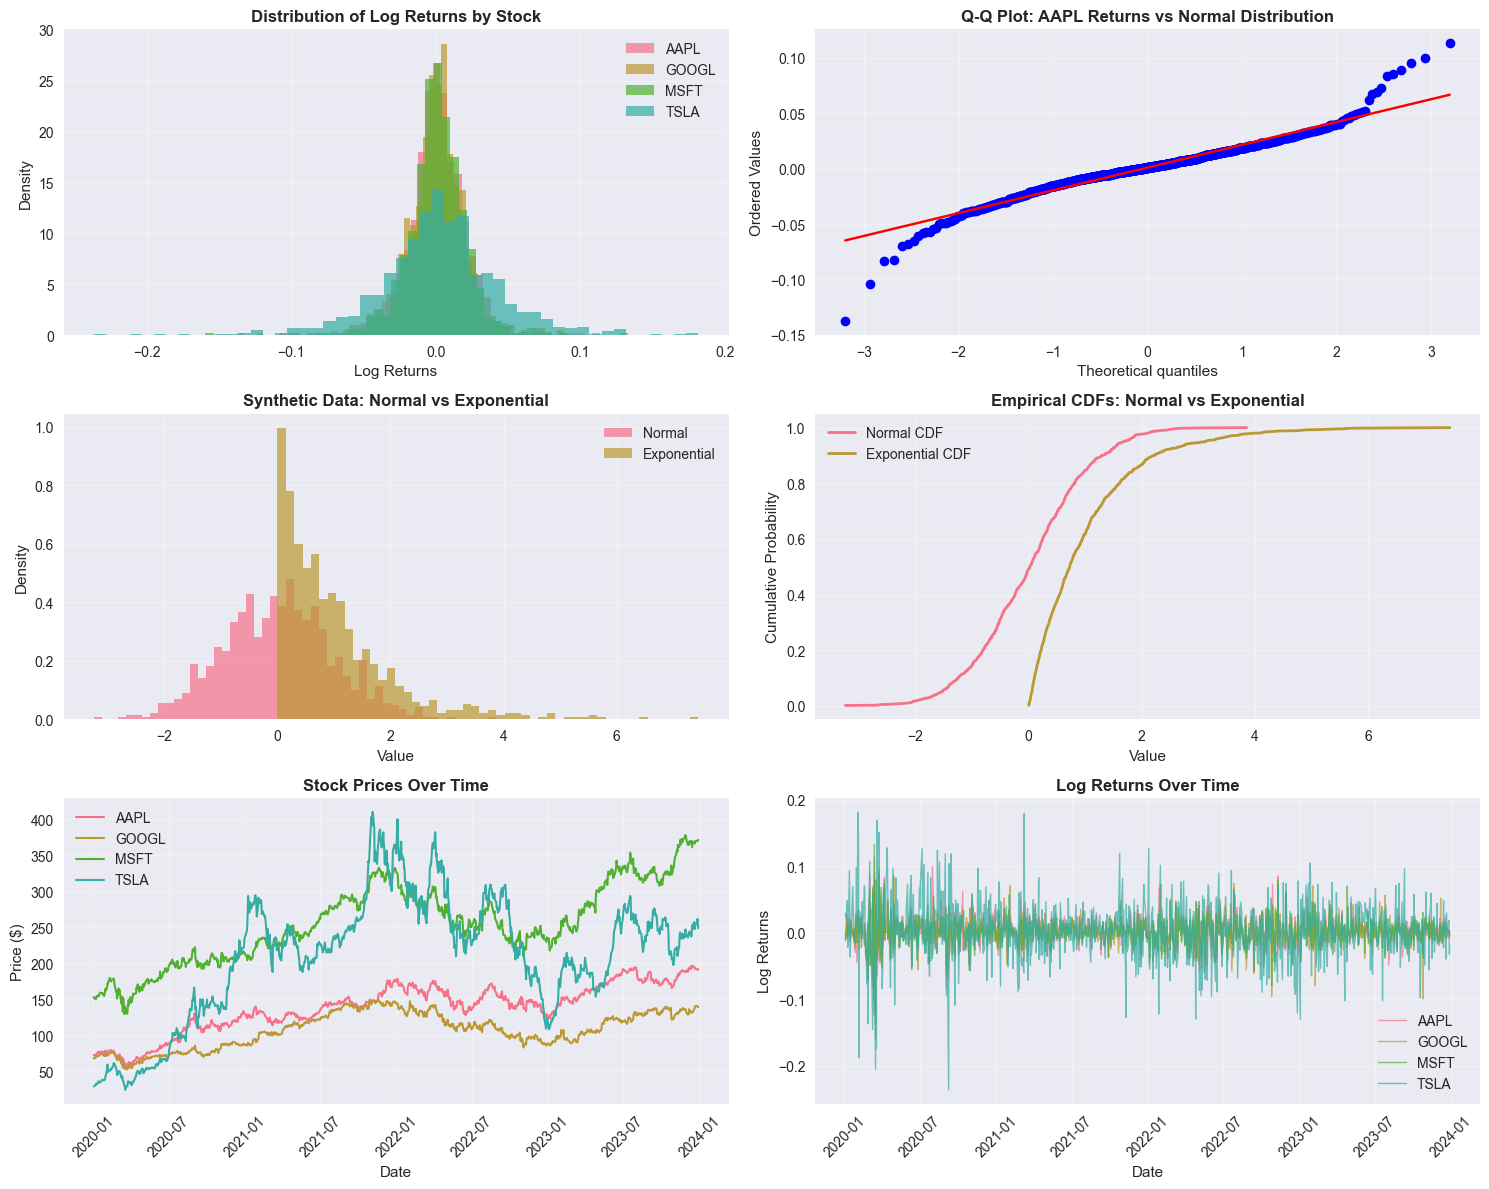

In [12]:
# Visualization of distributions for KS test examples
plt.figure(figsize=(15, 12))

# Plot 1: Stock log returns histograms
plt.subplot(3, 2, 1)
for stock in stocks:
    plt.hist(log_returns[stock].dropna(), bins=50, alpha=0.7, label=stock, density=True)
plt.title('Distribution of Log Returns by Stock', fontweight='bold')
plt.xlabel('Log Returns')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Q-Q plots for normality check
plt.subplot(3, 2, 2)
sample_data = log_returns['AAPL'].dropna()
stats.probplot(sample_data, dist="norm", plot=plt)
plt.title('Q-Q Plot: AAPL Returns vs Normal Distribution', fontweight='bold')
plt.grid(True, alpha=0.3)

# Plot 3: Synthetic data distributions
plt.subplot(3, 2, 3)
plt.hist(normal_data, bins=50, alpha=0.7, label='Normal', density=True)
plt.hist(exp_data, bins=50, alpha=0.7, label='Exponential', density=True)
plt.title('Synthetic Data: Normal vs Exponential', fontweight='bold')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: CDF comparison for KS test visualization
plt.subplot(3, 2, 4)
x_norm = np.sort(normal_data)
y_norm = np.arange(1, len(x_norm) + 1) / len(x_norm)
x_exp = np.sort(exp_data)
y_exp = np.arange(1, len(x_exp) + 1) / len(x_exp)

plt.plot(x_norm, y_norm, label='Normal CDF', linewidth=2)
plt.plot(x_exp, y_exp, label='Exponential CDF', linewidth=2)
plt.title('Empirical CDFs: Normal vs Exponential', fontweight='bold')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 5: Stock price time series
plt.subplot(3, 2, 5)
for stock in stocks:
    plt.plot(df.index, df[stock], label=stock, linewidth=1.5)
plt.title('Stock Prices Over Time', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Plot 6: Log returns time series
plt.subplot(3, 2, 6)
for stock in stocks:
    plt.plot(log_returns.index, log_returns[stock], label=stock, alpha=0.7, linewidth=1)
plt.title('Log Returns Over Time', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Summary and Key Takeaways

### Test Interpretations:

1. **ADF Test (Augmented Dickey-Fuller)**:
   - Tests for unit root (non-stationarity)
   - H0: Series has unit root (non-stationary)
   - If p-value < 0.05: Reject H0 → Series is **stationary**

2. **KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin)**:
   - Tests for stationarity around a trend
   - H0: Series is stationary
   - If p-value > 0.05: Fail to reject H0 → Series is **stationary**

3. **KS Test (Kolmogorov-Smirnov)**:
   - Tests for distribution equality
   - Two-sample: Tests if two samples come from same distribution
   - One-sample: Tests if sample follows specific distribution

### Best Practices:

- **For Stationarity**: Use both ADF and KPSS tests for robust conclusions
- **For Financial Data**: Stock prices are typically non-stationary, but returns are often stationary
- **For Distribution Testing**: Use KS test to compare distributions or test normality assumptions